In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from collections import Counter



In [97]:
raw_boston = pd.read_csv('Housing.csv')
raw_boston.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [98]:
raw_boston['mainroad'] = raw_boston['mainroad'].map({'yes':1, 'no':0})
raw_boston['guestroom'] = raw_boston['guestroom'].map({'yes':1, 'no':0})
raw_boston['basement'] = raw_boston['basement'].map({'yes':1, 'no':0})
raw_boston['hotwaterheating'] = raw_boston['hotwaterheating'].map({'yes':1, 'no':0})
raw_boston['airconditioning'] = raw_boston['airconditioning'].map({'yes':1, 'no':0})
raw_boston['prefarea'] = raw_boston['prefarea'].map({'yes':1, 'no':0})
raw_boston['furnishingstatus'] = raw_boston['furnishingstatus'].map({'furnished':1, 'semi-furnished':0.5,'unfurnished':0})

In [99]:
raw_boston.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


Text(0.5, 1.0, 'House Correlation Heatmap')

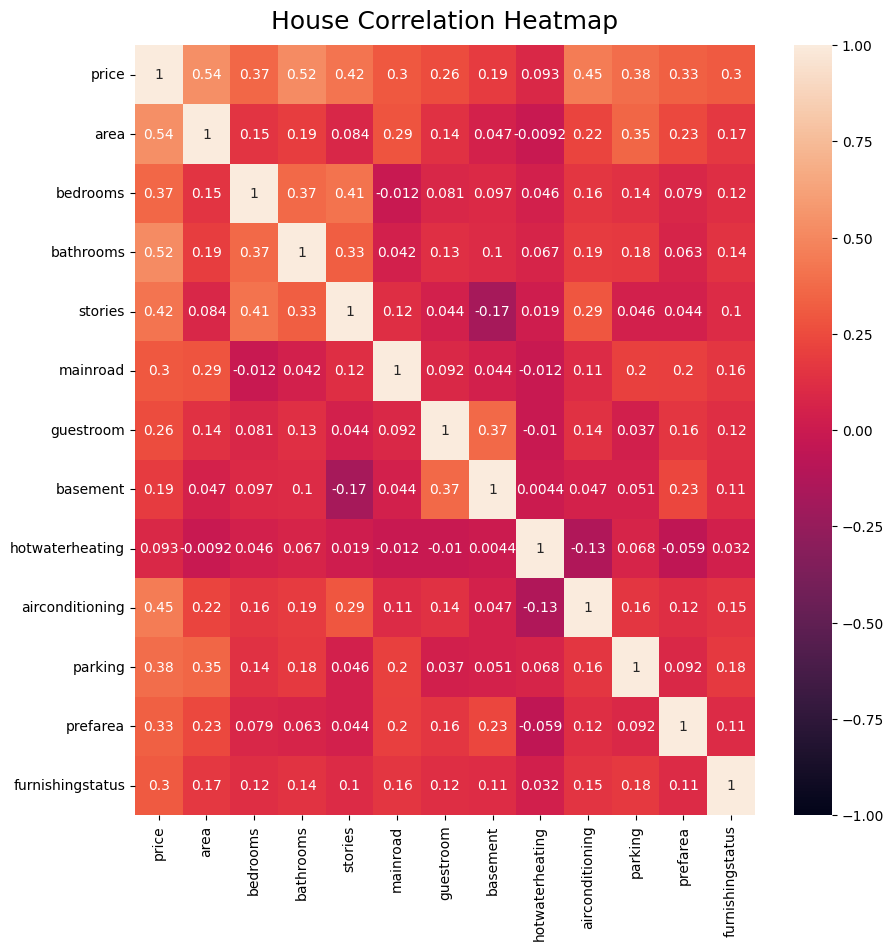

In [100]:
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(raw_boston.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('House Correlation Heatmap', fontdict = {'fontsize' : 18}, pad = 12)

In [101]:
numerical_features = raw_boston.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_features.corr()

In [102]:
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_price 

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
Name: price, dtype: float64

In [103]:
X = numerical_features.drop(columns='price')

In [104]:
X = numerical_features.drop(columns=['price', 'hotwaterheating'])

In [105]:
Y = numerical_features['price']

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [107]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred_linear = linear_model.predict(X_test)

In [108]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, Y_train)
Y_pred_poly = poly_model.predict(X_poly_test)

In [109]:
# Calculate performance metrics for both models
# mse_linear = metrics.mean_squared_error(Y_test, Y_pred_linear)
r2_linear = metrics.r2_score(Y_test, Y_pred_linear)
# mse_poly = metrics.mean_squared_error(Y_test, Y_pred_poly)
r2_poly = metrics.r2_score(Y_test, Y_pred_poly)
# mse_linear, mse_poly,
r2_linear, r2_poly

(0.6828901886596498, 0.6220561803459876)